# Imbalanced Classification

In many real world classification problems, you run into the problem of class imbalance. That is, one of your classes appears much more frequently than the other(s). Examples include: email spam detection, fraud detection, etc. This can be problematic, since your model may learn the data for the class with the higher frequency (Negative), when you are mostly interested in predicting the class with the lower frequency (Positive).

Here I describe:
- Common pitfalls when dealing with imbalanced data
- Methods to synthetically improve datasets for imbalanced classification
- Correctly evaluating models on imbalanced datasets

## Common Pitfalls

A very common pitfall when dealing with imbalanced datasets is the choice of the metric. Typically, we use accuracy to measure how well our classification tasks perform. However, because we are interested in predicting the positive class, accuracy can be misleading because it prioritises the negative class. This is shown in the schematic below:

![class_imb_acc](images/imbalanced_classes/class_imb_acc.png)

As such, you need to use a metric that emphasises how correctly you classify the positive classes. Recall and the F-Score can be used for this. As a reminder, they are given by:

$$
\text{Recall} = \frac{TP}{TP+FN}
$$

$$
F_\beta = (1+\beta^2)\frac{\text{Precision}\cdot \text{Recall}}{\beta^2\text{Precision} + \text{Recall}}
$$

The weight $\beta$ can be used to control how much emphasis you give to Precision. Precision is defined as: $\text{Precision}=TP/(TP+FP)$

Let's consider the effect this has for different values of $\beta$.

![recall-f-score](images/imbalanced_classes/recall-f-score.png)

## Synthetically Improving Dataset

## Evaluating Imbalanced Datasets

## Experiments

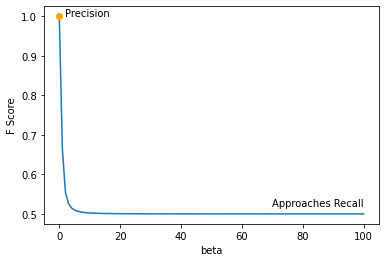

In [48]:
import matplotlib.pyplot as plt
import numpy as np
betas = np.linspace(0, 100, 100)

y = np.array([0, 1, 0, 0, 1, 0, 0, 0, 0 ,0])
y_pred = np.array([0,1, 0,0,0,0,0,0,0,0])

def f_score(y, y_pred, beta):
    p = precision(y, y_pred)
    r = recall(y, y_pred)
    beta_2 = beta ** 2
    return (1+beta_2) * (r * p) / (beta_2 * p + r)
def precision(y, y_pred):
    bool_ids = y == y_pred
    TP = np.sum(bool_ids[y == 1])
    FP = np.sum(~bool_ids[y == 0])
    
    return TP/(TP+FP)

def recall(y, y_pred):
    bool_ids = y == y_pred
    
    TP = np.sum(bool_ids[y == 1])
    FN = np.sum(~bool_ids[y == 1])
    
    return TP/(TP+FN)

plt.plot(betas, f_score(y, y_pred, betas))
plt.plot(0, 1, 'o', c='orange')
plt.xlabel('beta')
plt.ylabel('F Score')
plt.text(2, 1, "Precision")
plt.text(70, 0.52, "Approaches Recall")
plt.savefig('f-score-curve.png', dpi=600)


# multiclass recall?